# Understanding Labour Market

## About the challenge

** India produces 1.5 million engineers every year. A relevant question is what determines the salary and the jobs these engineers are offered right after graduation. Various factors such as college grades, candidate skills, proximity of the college to industrial hubs, the specialization one is in, market conditions for specific industries determine this. **

** Given profiles of several students with varied background, use the data to get insights and answers to these following questions: **

* **Predictive Modelling** - Given a new student profile, can we predict his/her **annual salary** from historic data?
* **Recommendation** - Can we identify the key set of parameters in his profile changing which, she/he would get to earn a **better salary**?
* **Data Insights** - Can we understand what factors in the labor market determine one’s salary? Is it just one’s skills or there are other factors which influence the return in the labor market? What signals and biases enter the labor market? Can we make interpretable models or visualize features to understand what determines salary – for instance do kids from smaller towns get lower salaries? This can help us understand inefficiencies in the labor market, which will be extremely useful for policy making and constructing interventions.
* **Visualization** - Finally, can we visualize **where** and **what** jobs people get to get a quick and deeper understanding? 

In [1]:
# display inline plots
%matplotlib inline

# import libraries for numerical and scientific computing
import numpy as np

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import pandas for data wrangling and munging
import pandas as pd

# set some options for better view
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# import plotting library built on top of matplotlib
import seaborn as sns

# set some settings related to style of plots that will render
sns.set_style("whitegrid")
sns.set_context("poster")

import warnings
warnings.filterwarnings('ignore')

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_excel('./data/train.xlsx', parse_dates=True)
test = pd.read_excel('./data/test.xlsx', parse_dates=True)

In [3]:
# set ID as the index
train = train.set_index('ID')
test = test.set_index('ID')

## Data Description

|Input|Description|
|------|------|
|ID  |A unique ID to identify a candidate  |
|Salary  |Annual CTC offered to the candidate (in INR)  |
|DOJ  |Date of joining the company  |
|DOL  |Date of leaving the company  |
|Designation  |Designation offered in the job  |
|JobCity  |City in which the candidate is offered the job  |
|Gender  |Candidate's gender  |
|DOB  |Date of birth of candidate  |
|10percentage  |Overall marks obtained in grade 10 examinations  |
|10board  |The school board whose curriculum the candidate followed in grade 10  |
|12graduation  |Year of graduation - senior year high school  |
|12percentage  |Overall marks obtained in grade 12 examinations  |
|12board  |The school board whose curriculum the candidate followed  |
|CollegeID  |Unique ID identifying the university/college which the candidate attended for her/his undergraduate  |
|CollegeTier  |Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold as tagged as 1 and others as 2.  |
|Degree  |Degree obtained/pursued by the candidate  |
|Specialization  |Specialization pursued by the candidate  |
|CollegeGPA  |Aggregate GPA at graduation  |
|CollegeCityID  |A unique ID to identify the city in which the college is located in.  |
|CollegeCityTier  |The tier of the city in which the college is located in. This is annotated based on the population of the cities.  |
|CollegeState  |Name of the state in which the college is located  |
|GraduationYear  |Year of graduation (Bachelor's degree)  |
|English  |Scores in AMCAT English section  |
|Logical  |Score in AMCAT Logical ability section  |
|Quant  |Score in AMCAT's Quantitative ability section  |
|Domain  |Scores in AMCAT's domain module  |
|ComputerProgramming  |Score in AMCAT's Computer programming section  |
|ElectronicsAndSemicon  |Score in AMCAT's Electronics & Semiconductor Engineering section  |
|ComputerScience  |Score in AMCAT's Computer Science section  |
|MechanicalEngg  |Score in AMCAT's Mechanical Engineering section  |
|ElectricalEngg  |Score in AMCAT's Electrical Engineering section  |
|TelecomEngg  |Score in AMCAT's Telecommunication Engineering section  |
|CivilEngg  |Score in AMCAT's Civil Engineering section  |
|conscientiousness  |Score in one of the sections of AMCAT's personality test  |
|agreeableness  |Scores in one of the sections of AMCAT's personality test  |
|extraversion  |Scores in one of the sections of AMCAT's personality test  |
|nueroticism  |Scores in one of the sections of AMCAT's personality test  |
|openess_to_experience  |Scores in one of the sections of AMCAT's personality test  |


In [4]:
# preprocess columns to lowercase letters
train.columns = train.columns.map(lambda x: x.lower())
test.columns = test.columns.map(lambda x: x.lower())

In [5]:
train.columns

Index([u'salary', u'doj', u'dol', u'designation', u'jobcity', u'gender', u'dob', u'10percentage', u'10board', u'12graduation', u'12percentage', u'12board', u'collegeid', u'collegetier', u'degree', u'specialization', u'collegegpa', u'collegecityid', u'collegecitytier', u'collegestate', u'graduationyear', u'english', u'logical', u'quant', u'domain', u'computerprogramming', u'electronicsandsemicon', u'computerscience', u'mechanicalengg', u'electricalengg', u'telecomengg', u'civilengg',
       u'conscientiousness', u'agreeableness', u'extraversion', u'nueroticism', u'openess_to_experience'],
      dtype='object')

## Data Exploration

### Question: Which cities provide most job opportunities for engineers ?

In [6]:
# lets check out the jobcity column
train.jobcity.unique()

array([u'Bangalore', u'Indore', u'Chennai', u'Gurgaon', u'Manesar',
       u'Hyderabad', u'Banglore', u'Noida', u'Kolkata', u'Pune', -1,
       u'mohali', u'Jhansi', u'Delhi', u'Hyderabad ', u'Bangalore ',
       u'noida', u'delhi', u'Bhubaneswar', u'Navi Mumbai', u'Mumbai',
       u'New Delhi', u'Mangalore', u'Rewari', u'Gaziabaad', u'Bhiwadi',
       u'Mysore', u'Rajkot', u'Greater Noida', u'Jaipur', u'noida ',
       u'HYDERABAD', u'mysore', u'THANE', u'Maharajganj',
       u'Thiruvananthapuram', u'Punchkula', u'Bhubaneshwar', u'Pune ',
       u'coimbatore', u'Dhanbad', u'Lucknow', u'Trivandrum', u'kolkata',
       u'mumbai', u'Gandhi Nagar', u'Una', u'Daman and Diu', u'chennai',
       u'GURGOAN', u'vsakhapttnam', u'pune', u'Nagpur', u'Bhagalpur',
       u'new delhi - jaisalmer', u'Coimbatore', u'Ahmedabad',
       u'Kochi/Cochin', u'Bankura', u'Bengaluru', u'Mysore ', u'Kanpur ',
       u'jaipur', u'Gurgaon ', u'bangalore', u'CHENNAI', u'Vijayawada',
       u'Kochi', u'Beawar', u'

** There are some missing values marked as -1, we would have to convert these into strings and then would have to preprocess these city names so that Noida, NOIDA, noida all count as one **

In [7]:
train['jobcity'] = train.jobcity.astype('str')
test['jobcity'] = test.jobcity.astype('str')

In [8]:
def preprocess_city_name(city_name):
    city_name = city_name.strip()
    city_name = city_name.lower()
    return city_name

train['jobcity'] = train.jobcity.map(preprocess_city_name)
test['jobcity'] = test.jobcity.map(preprocess_city_name)

In [9]:
# now lets find out the count distribution for various cities
train.jobcity.value_counts()[:10]

bangalore    665
-1           461
noida        389
hyderabad    368
pune         327
chennai      313
gurgaon      217
new delhi    204
mumbai       119
kolkata      119
Name: jobcity, dtype: int64

** As you can see Bangalore leads the way followed by Noida, Hyderabad and Pune, most people did not mention their city.**

## Question: What are the mean salaries in various cities ?

In [10]:
# group data by city
group_by_city = train.groupby('jobcity')['salary']
group_by_city.mean().order(ascending=False)[:10]

jobcity
kalmar, sweden    2300000
london            2000000
johannesburg      1745000
angul             1300000
maharajganj       1200000
dubai             1140000
muzaffarpur       1000000
durgapur           850000
dammam             775000
panchkula          733333
Name: salary, dtype: int64

** As you can see Indians working abroad earn much more **

## Question: What are the median salaries in various cities ?

In [11]:
# group data by city
group_by_city = train.groupby('jobcity')['salary']
group_by_city.median().order(ascending=False)[:10]

jobcity
kalmar, sweden    2300000
london            2000000
johannesburg      1745000
dubai             1300000
angul             1300000
maharajganj       1200000
muzaffarpur       1000000
durgapur           850000
dammam             775000
rajpura            700000
Name: salary, dtype: int64

## Boxplot of salaries

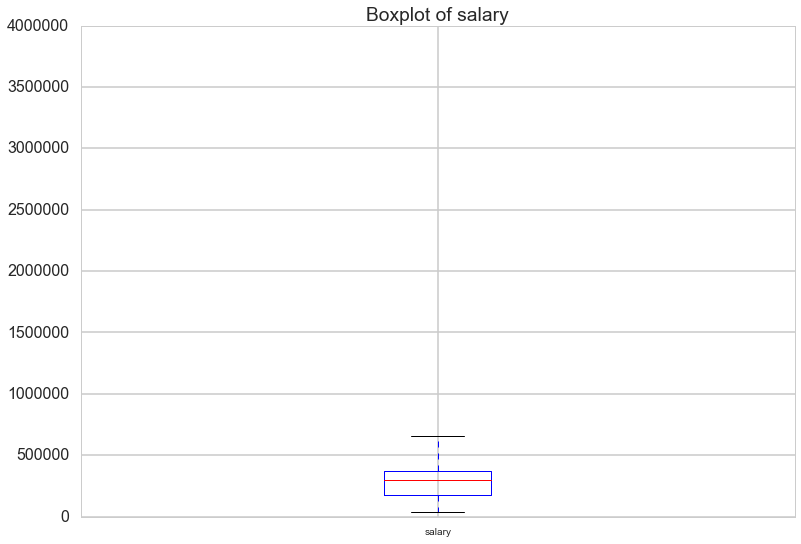

In [12]:
train.boxplot(column='salary')
plt.title('Boxplot of salary');

** Median salary is below 5 l.p.a **

## Distribution of the salary variable

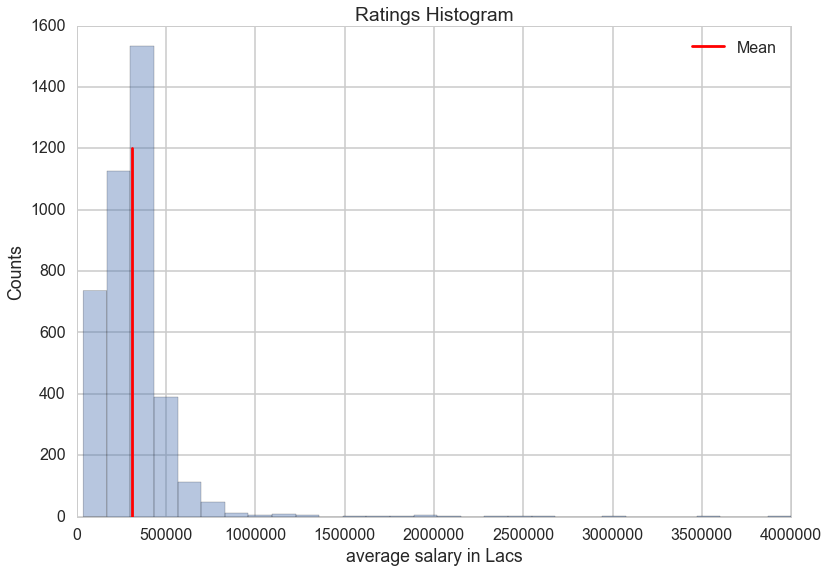

In [13]:
meansal = train.salary.mean()

train.salary.hist(bins=30, alpha=0.4);
plt.axvline(meansal, 0, 0.75, color='r', label='Mean')
plt.xlabel("average salary in Lacs")
plt.ylabel("Counts")
plt.title("Ratings Histogram")
plt.legend();

** Right skewed distribution, will have to take care of this in the modelling process **

## Question: What are different specializations pursued by our engineers ?

In [14]:
train.specialization.unique()

array([u'computer engineering',
       u'electronics and communication engineering',
       u'information technology', u'computer science & engineering',
       u'mechanical engineering',
       u'electronics and electrical engineering',
       u'electronics & telecommunications',
       u'instrumentation and control engineering', u'computer application',
       u'electronics and computer engineering', u'electrical engineering',
       u'applied electronics and instrumentation',
       u'electronics & instrumentation eng',
       u'information science engineering', u'civil engineering',
       u'mechanical and automation',
       u'industrial & production engineering',
       u'control and instrumentation engineering',
       u'metallurgical engineering',
       u'electronics and instrumentation engineering',
       u'electronics engineering', u'ceramic engineering',
       u'chemical engineering', u'aeronautical engineering', u'other',
       u'biotechnology', u'embedded systems techn

** Computer science, computer application, computer engineering, computer science & engineering are one and the same one thing **

In [15]:
specialization_map = {
    'computer engineering': 'computer science',
    'computer science & engineering': 'computer science',
    'computer application': 'computer science',
    'computer science and technology': 'computer science',
    'computer and communication engineering': 'computer science',
    'computer networking': 'computer science',
    'electronics': 'electronics and communication engineering',
    'electronics engineering': 'electronics and communication engineering'
}

def preprocess_specialization(specialization):
    if specialization in specialization_map:
        return specialization_map[specialization]
    else:
        return specialization

train['specialization'] = train.specialization.map(preprocess_specialization)
test['specialization'] = test.specialization.map(preprocess_specialization)

In [16]:
# lets see the count distribution among various specializations
train.specialization.value_counts()[:10]

computer science                               1598
electronics and communication engineering       900
information technology                          660
mechanical engineering                          201
electronics and electrical engineering          196
electronics & telecommunications                121
electrical engineering                           82
electronics & instrumentation eng                32
civil engineering                                29
electronics and instrumentation engineering      27
Name: specialization, dtype: int64

** As you can see most of engineers have their specialization in computer science followed by electronics and communication
engineering, information technology and mechanical engineering **

## Does specialization has any effect on salary ?

In [17]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

In [18]:
group_by_specialization = train.groupby('specialization')['salary']
specialization_stats = group_by_specialization.apply(get_stats)

In [19]:
specialization_stats_unstack = specialization_stats.unstack(1)

In [20]:
# how does people with cs degree perform ?
specialization_stats_unstack.ix['computer science']

count       1598.000000
max      4000000.000000
mean      314161.451815
min        35000.000000
Name: computer science, dtype: float64

** Engineers with CS degree have a mean annual salary of around 3.14 lakhs **

In [21]:
## how does people with specialization in polymer technology ?
specialization_stats_unstack.ix['polymer technology']

count         1
max      700000
mean     700000
min      700000
Name: polymer technology, dtype: float64

** Engineers with degree in polymer technology earn a mean annual salary of around 7 lakhs. Since there was only one engineer in our dataset with this specialization so this is not of much importance. ** 

### Specialization statistics

In [22]:
specialization_stats_unstack

,count,max,mean,min
specialization,,,,
aeronautical engineering,3,180000,148333.333333,120000
applied electronics and instrumentation,9,950000,348333.333333,175000
automobile/automotive engineering,5,400000,222000.000000,100000
biomedical engineering,2,435000,290000.000000,145000
biotechnology,15,450000,254333.333333,100000
ceramic engineering,1,335000,335000.000000,335000
chemical engineering,9,730000,370000.000000,100000
civil engineering,29,800000,381206.896552,110000
computer science,1598,4000000,314161.451815,35000


## Salary distribution between different genders ?

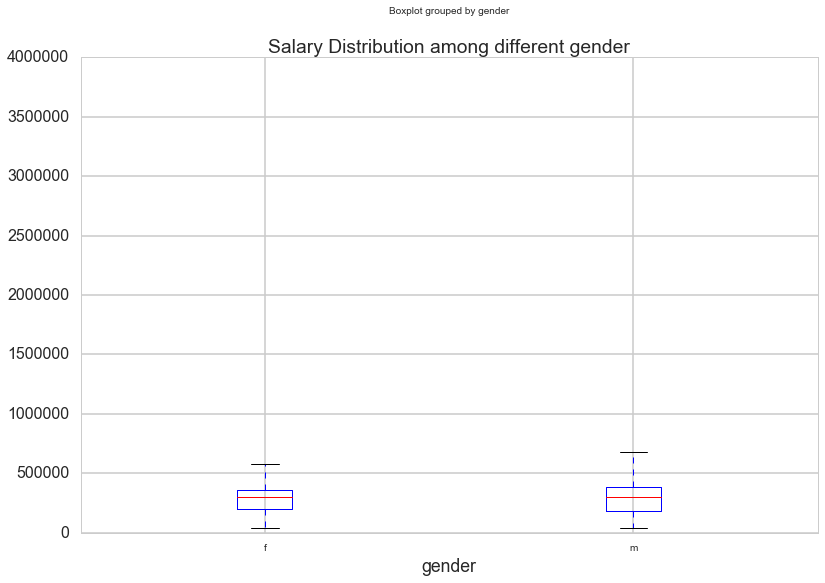

In [23]:
train.boxplot(column='salary', by='gender')
plt.title('Salary Distribution among different gender');

** Not much difference in what men and women earn as their mean annual salary. **

## Effect of date of birth on salaries

In [24]:
# create a new column dob_year
train['dob_year'] = train.dob.dt.year
test['dob_year'] = train.dob.dt.year

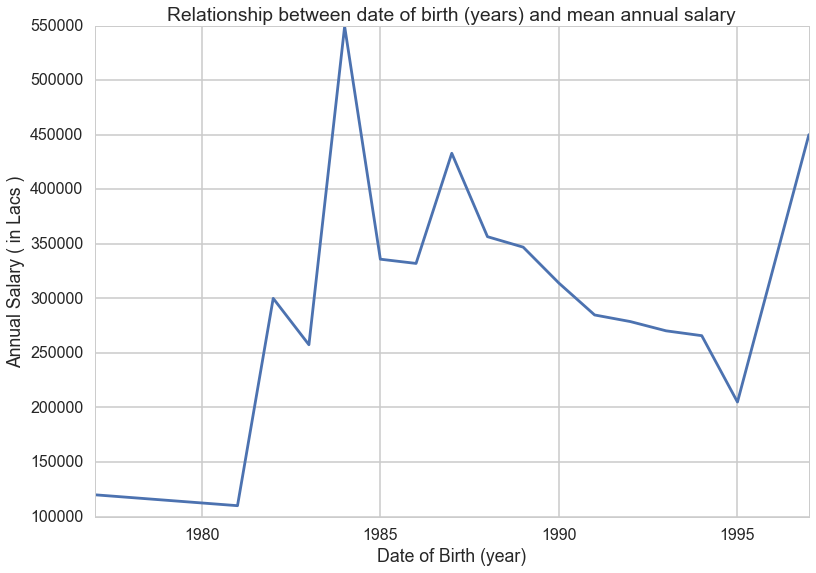

In [25]:
train_grouped_by_dob_year = train.groupby('dob_year')['salary']
train_grouped_by_dob_year.mean().plot()
plt.xlabel('Date of Birth (year)')
plt.ylabel('Annual Salary ( in Lacs )')
plt.title('Relationship between date of birth (years) and mean annual salary');

** As you can see mean salaries for engineers born around 1983-1984 are the highest. **

## Question: Does your 10th class percentage have any affect on your income ?

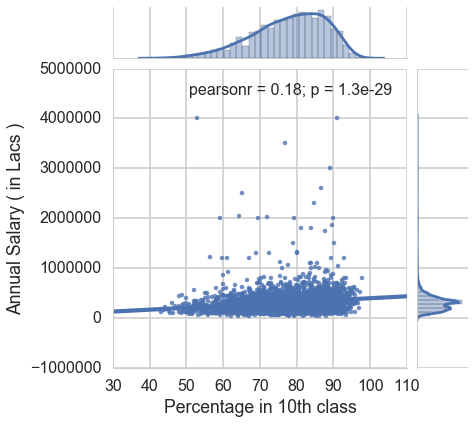

In [26]:
sns.jointplot(y="salary", x="10percentage", data=train, kind='reg')
plt.xlabel('Percentage in 10th class')
plt.ylabel('Annual Salary ( in Lacs )');

** There is a slight positive trend but most of them earn the same irrespective of their percentages in 10th class. **

## Does your 12th class percentage have an effect on your income ?

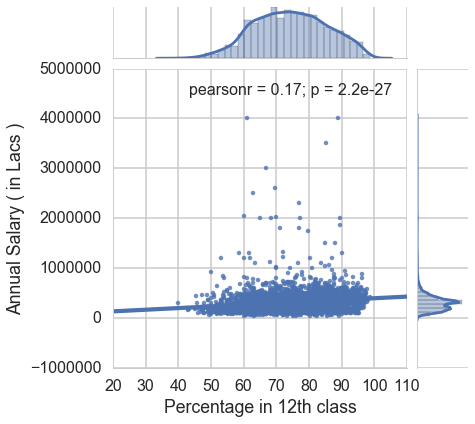

In [27]:
sns.jointplot(y="salary", x="12percentage", data=train, kind='reg')
plt.xlabel('Percentage in 12th class')
plt.ylabel('Annual Salary ( in Lacs )');

** There is a slight positive trend but there are certain individuals who are taking reasonable salary despite scoring poorly on their 12th class examinations **

## Question: Does your degree have an effect on your salary ?

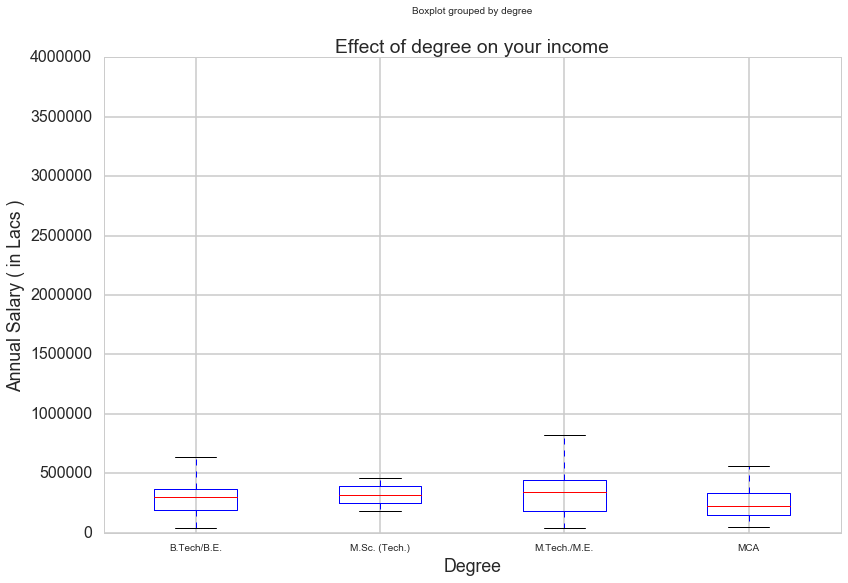

In [28]:
# lets create a boxplot of salary for different degrees
train.boxplot(column='salary', by='degree')
plt.xlabel('Degree')
plt.ylabel('Annual Salary ( in Lacs )')
plt.title('Effect of degree on your income');

** As you can see engineers who have completed either M.Sc. (Tech) or M.Tech/M.E. earn a bit more than undergraduates **

## Explore relationship among gender, degree and income

In [29]:
# lets create a pivot table with rows as gender, degree and column as salary
salary_with_gender_degree = train[['gender', 'degree', 'salary']]
pd.pivot_table(salary_with_gender_degree, index=['gender', 'degree'])

salary
gender degree               
f      B.Tech/B.E.    294713
       M.Sc. (Tech.)  180000
       M.Tech./M.E.   511666
       MCA            266724
m      B.Tech/B.E.    313021
       M.Sc. (Tech.)  460000
       M.Tech./M.E.   336363
       MCA            285216

** Females with M.Tech/M.E. earn a mean annual salary greater than their male counterparts with same degree. Is it good to pursue post graduation ? **

## Does your college gpa have an effect on your income ?

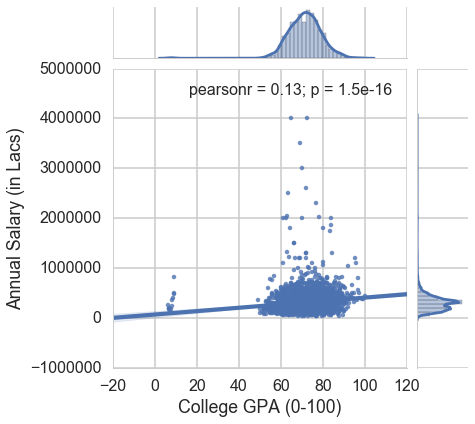

In [30]:
sns.jointplot(x="collegegpa", y="salary", data=train, kind='reg')
plt.xlabel('College GPA (0-100)')
plt.ylabel('Annual Salary (in Lacs)');

** There is a cluster of engineers with very low gpa ( <20% ), may be this is not reported correctly because you need to score atleast 40%. Another curious pattern that emerges is that engineers who score gpa between (70% - 80%) earn hefty salaries. ** 

## Relationship among college's tier, degree and income

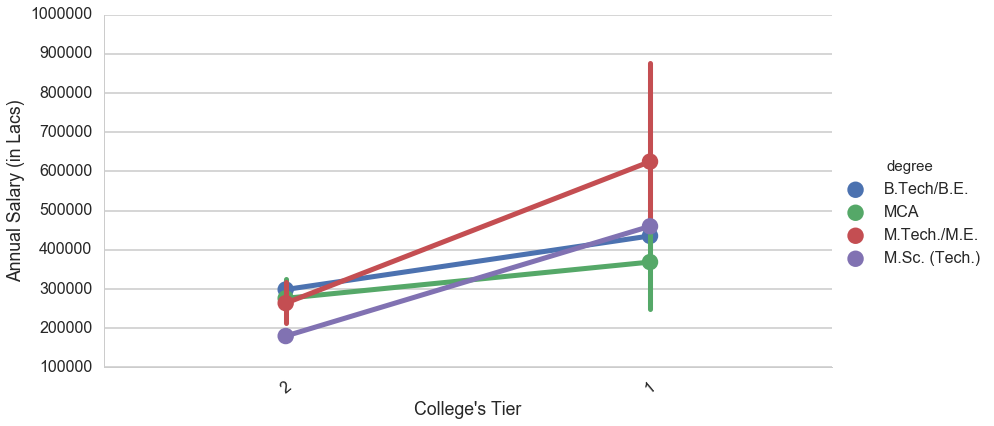

In [31]:
sns.factorplot(x="collegetier", y="salary", hue="degree", data=train, size=6, aspect=2)
plt.xlabel('College\'s Tier')
plt.ylabel('Annual Salary (in Lacs)')
plt.xticks(rotation=40);

** As you can see there is much difference in what engineeres coming from tier 1 college earn compared to what those earn from tier 2 colleges. **

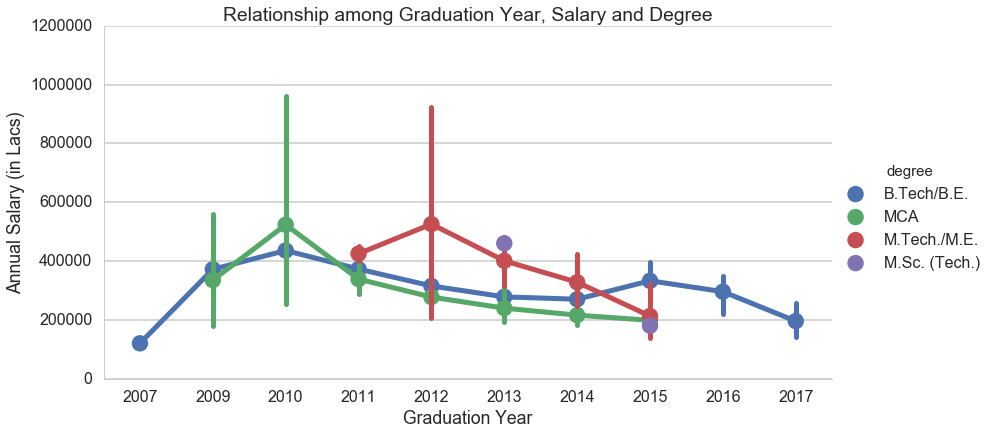

In [32]:
train_without_missing_grad_year = train[train.graduationyear != 0]
train_without_missing_grad_year = train_without_missing_grad_year.sort(columns='graduationyear')

sns.factorplot(x="graduationyear", y="salary", hue="degree", data=train_without_missing_grad_year, size=6, aspect=2)
plt.xlabel('Graduation Year')
plt.ylabel('Annual Salary (in Lacs)')
plt.title('Relationship among Graduation Year, Salary and Degree');

** Engineers who passed out in the year 2010 with B.Tech/B.E. earn a lot more than many of the recent undergrads, same is the case with grad students with M.Tech/M.E. those who passed out in the year 2012 earn much higher than any of other grad students. MCA students are not being offered high salaries. **

## Relationship between Mean Annual Salary with AMCAT scores

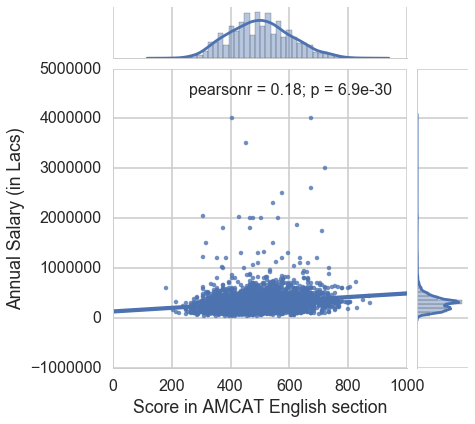

In [33]:
sns.jointplot(x="english", y="salary", data=train, kind='reg')
plt.xlabel('Score in AMCAT English section')
plt.ylabel('Annual Salary (in Lacs)');

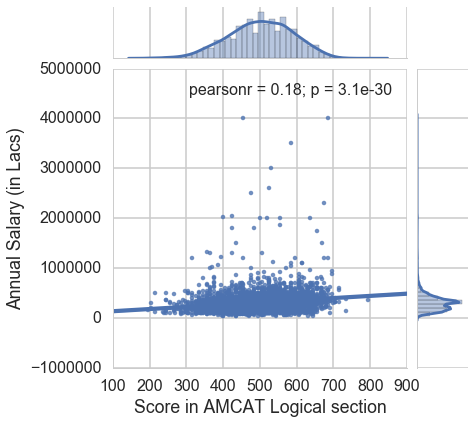

In [34]:
sns.jointplot(x="logical", y="salary", data=train, kind='reg')
plt.xlabel('Score in AMCAT Logical section')
plt.ylabel('Annual Salary (in Lacs)');

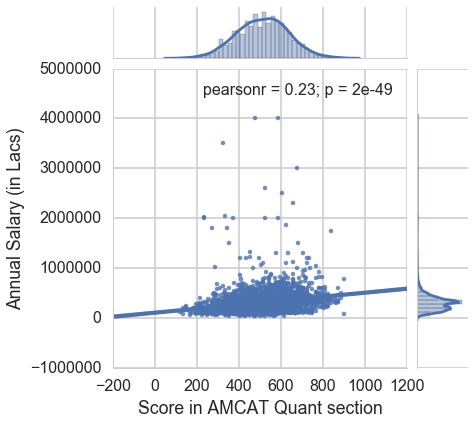

In [35]:
sns.jointplot(x="quant", y="salary", data=train, kind='reg')
plt.xlabel('Score in AMCAT Quant section')
plt.ylabel('Annual Salary (in Lacs)');

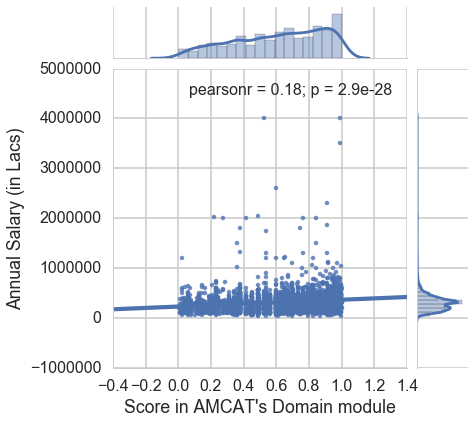

In [36]:
sns.jointplot(x="domain", y="salary", data=train[train.domain>0], kind='reg')
plt.xlabel('Score in AMCAT\'s Domain module')
plt.ylabel('Annual Salary (in Lacs)');

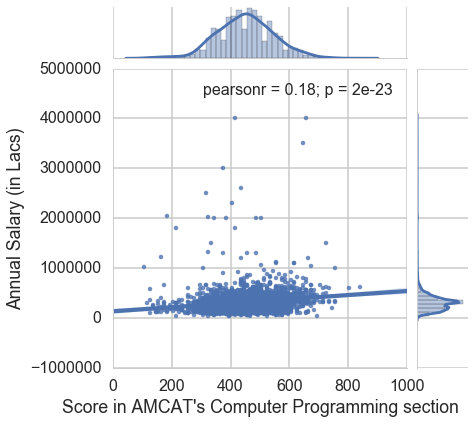

In [37]:
sns.jointplot(x="computerprogramming", y="salary", data=train[train.computerprogramming>0], kind='reg')
plt.xlabel('Score in AMCAT\'s Computer Programming section')
plt.ylabel('Annual Salary (in Lacs)');

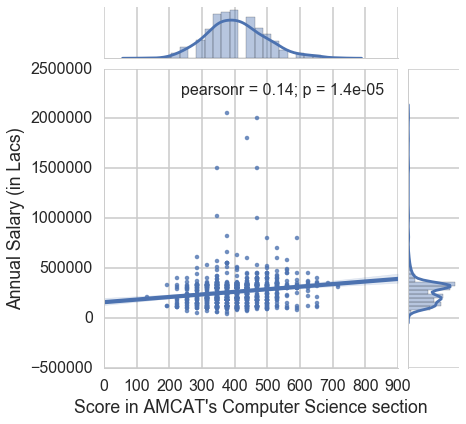

In [38]:
sns.jointplot(x="computerscience", y="salary", data=train[train.computerscience>0], kind='reg')
plt.xlabel('Score in AMCAT\'s Computer Science section')
plt.ylabel('Annual Salary (in Lacs)');

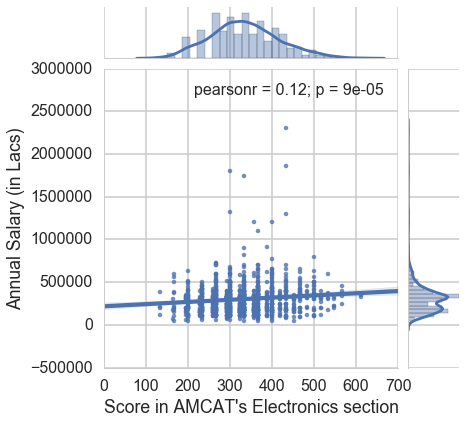

In [39]:
sns.jointplot(x="electronicsandsemicon", y="salary", data=train[train.electronicsandsemicon>0], kind='reg')
plt.xlabel('Score in AMCAT\'s Electronics section')
plt.ylabel('Annual Salary (in Lacs)');

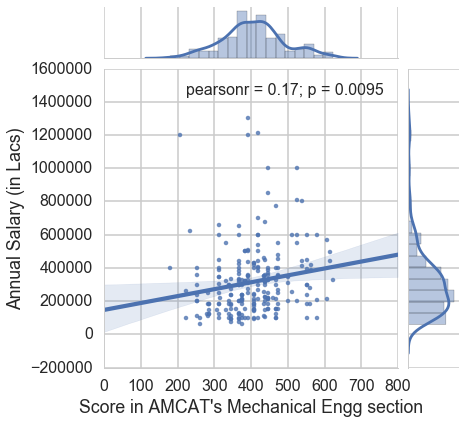

In [41]:
sns.jointplot(x="mechanicalengg", y="salary", data=train[train.mechanicalengg>0], kind='reg')
plt.xlabel('Score in AMCAT\'s Mechanical Engg section')
plt.ylabel('Annual Salary (in Lacs)');

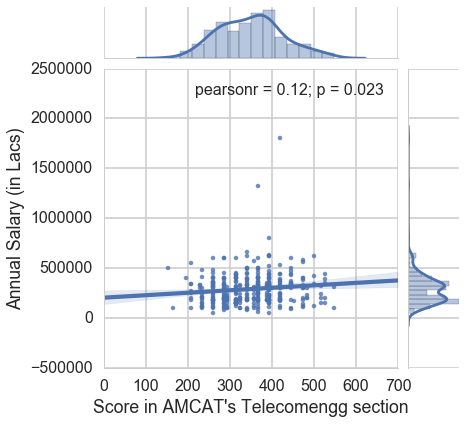

In [42]:
sns.jointplot(x="telecomengg", y="salary", data=train[train.telecomengg>0], kind='reg')
plt.xlabel('Score in AMCAT\'s Telecomengg section')
plt.ylabel('Annual Salary (in Lacs)');

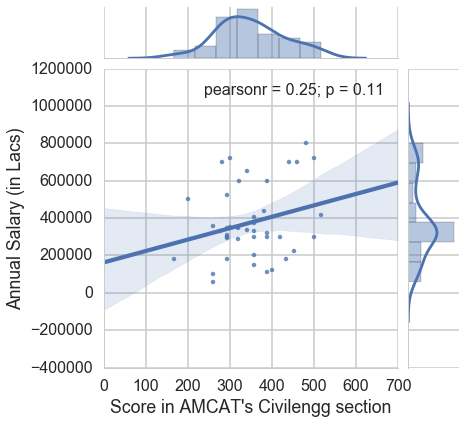

In [43]:
sns.jointplot(x="civilengg", y="salary", data=train[train.civilengg>0], kind='reg')
plt.xlabel('Score in AMCAT\'s Civilengg section')
plt.ylabel('Annual Salary (in Lacs)');

In [44]:
personality_section_score = train.conscientiousness + train.agreeableness + train.nueroticism + \
                            train.openess_to_experience + train.extraversion

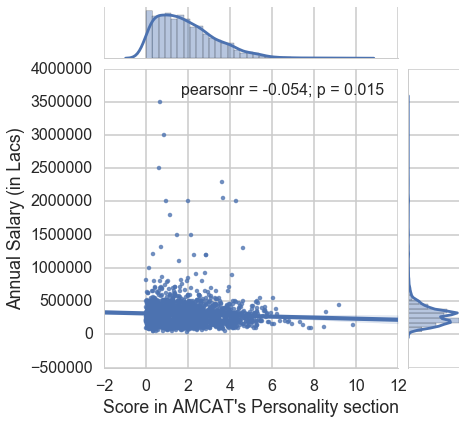

In [45]:
train['personality_section_score'] = personality_section_score

sns.jointplot(x="personality_section_score", y="salary", data=train[train.personality_section_score>0], kind='reg')
plt.xlabel('Score in AMCAT\'s Personality section')
plt.ylabel('Annual Salary (in Lacs)');

** Looks like AMCAT's personality section score has no effect on what we earn, huh will look into this in detail. **

## Let us take a look at those individuals earning more than mean annual salary

In [46]:
mask = (train.salary > train.salary.mean())
high_salaries = train[mask]

In [47]:
# number of such individuals
print 'Number of individuals earning more than mean annual salaries %d ' %(high_salaries.shape[0]) 

Number of individuals earning more than mean annual salaries 1799 


In [48]:
# percentage people earning more than mean annual salaries
print '%f people earn more than mean annual salaries ' %(high_salaries.shape[0] / float(train.shape[0]) * 100)

44.997499 people earn more than mean annual salaries 


## Lets us look at the trait of these high earners

In [49]:
# lets look at the designation held up by these individuals
high_salaries_grouped_by_designation = high_salaries.groupby('designation')
high_salaries_grouped_by_designation.size().order(ascending=False)[:20]

designation
software engineer              319
system engineer                168
systems engineer               104
programmer analyst             100
software developer              83
senior software engineer        64
java software engineer          45
software test engineer          41
assistant manager               40
project engineer                40
application developer           38
senior systems engineer         35
test engineer                   30
business analyst                26
associate software engineer     23
engineer                        22
java developer                  21
assistant system engineer       21
senior software developer       19
senior engineer                 16
dtype: int64

** Most of them are software engineers, system engineer or programmer analyst. **

In [59]:
# lets see the distribution of salaries among various designations
high_salaries_grouped_by_designation = high_salaries.groupby('designation')['salary']
designation_stats = high_salaries_grouped_by_designation.apply(get_stats)

In [62]:
designation_salary_df = designation_stats.unstack(1)

In [65]:
designation_salary_df.sort(columns='mean', ascending=False)[:20]

,count,max,mean,min
designation,,,,
software engineer trainee,1,2050000,2050000.000000,2050000
it technician,1,2000000,2000000.000000,2000000
field engineer,1,1860000,1860000.000000,1860000
sales account manager,1,1320000,1320000.000000,1320000
junior manager,1,1300000,1300000.000000,1300000
data scientist,2,2000000,1225000.000000,450000
office coordinator,1,1200000,1200000.000000,1200000
client services associate,2,1800000,1180000.000000,560000
senior developer,1,1110000,1110000.000000,1110000


** Designations that lead up to high salaries **

## Let's see if there is a relationship between your college city and salary

In [65]:
cities_count = train.collegecityid.value_counts().order(ascending=False)
freq_cities = list(cities_count[:20].index)
infreq_cities = list(cities_count[:-20].index)

In [67]:
train_freq_cities = train[train.collegecityid.isin(freq_cities)]
train_infreq_cities = train[train.collegecityid.isin(infreq_cities)]

327750.902527


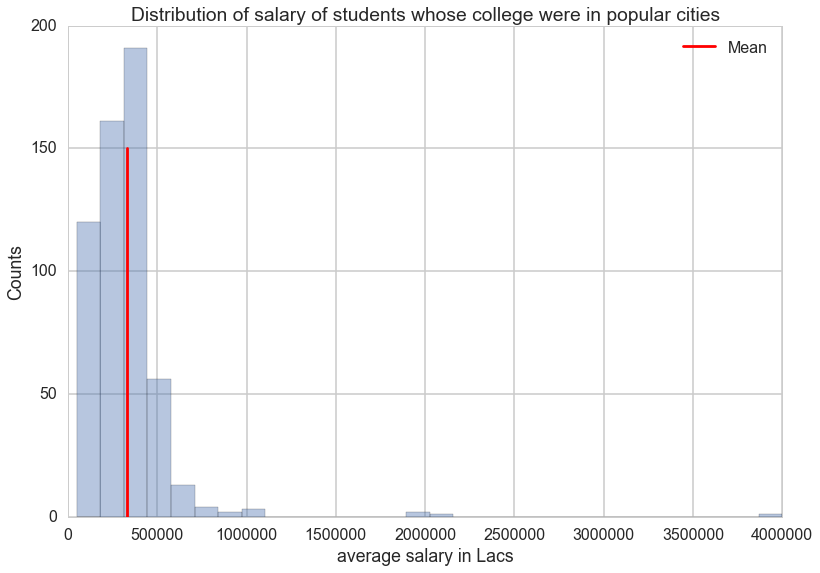

In [75]:
# distribution of salaries in most frequent cities
meansal = train_freq_cities.salary.mean()
print meansal

train_freq_cities.salary.hist(bins=30, alpha=0.4);
plt.axvline(meansal, 0, 0.75, color='r', label='Mean')
plt.xlabel("average salary in Lacs")
plt.ylabel("Counts")
plt.title("Distribution of salary of students whose college were in popular cities")
plt.legend();

307893.162393


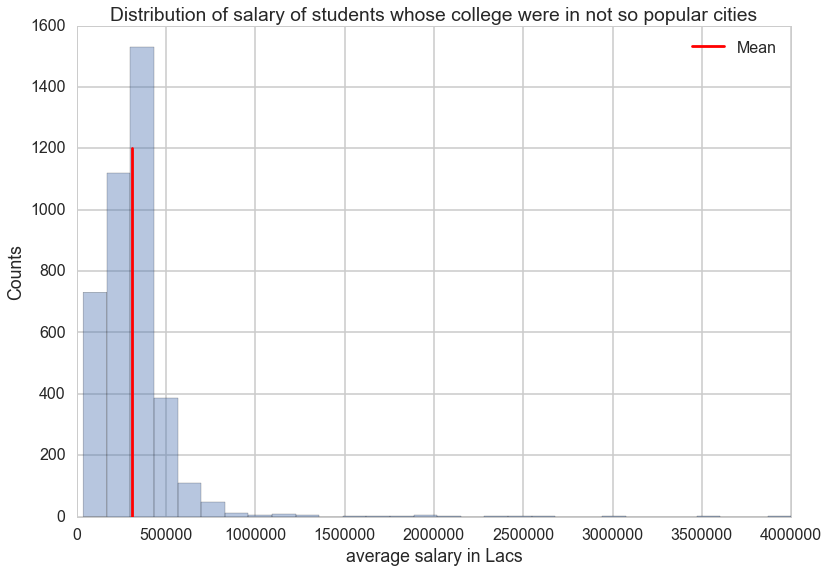

In [74]:
meansal = train_infreq_cities.salary.mean()
print meansal

train_infreq_cities.salary.hist(bins=30, alpha=0.4);
plt.axvline(meansal, 0, 0.75, color='r', label='Mean')
plt.xlabel("average salary in Lacs")
plt.ylabel("Counts")
plt.title("Distribution of salary of students whose college were in not so popular cities")
plt.legend();

** So people who studied from colleges in not so popular cities earn sligh